In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("mnist.csv")

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


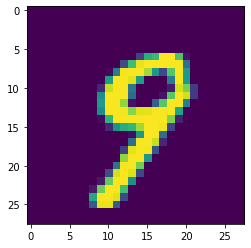

In [5]:
#plotting the graph with pixels
a=data.iloc[4999,1:].values
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)

It Shows the no. 9 in graph and its is the value of its label

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 29.9 MB


In [7]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,1:]
Y=data.iloc[:,0]

In [8]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X,Y,test_size=0.2) 

In [9]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=100)

In [10]:
model1.fit(X_tr,Y_tr)

RandomForestClassifier()

In [11]:
pred1=model1.predict(X_ts)

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def OutputAcc(ytest,pred):
    print("Confusion Matrix:\n",confusion_matrix(ytest,pred))
    print("Accuracy:",accuracy_score(ytest,pred))
    print("Classification Report:\n",classification_report(ytest,pred))

In [13]:
OutputAcc(Y_ts,pred1)

Confusion Matrix:
 [[ 86   0   0   0   0   0   1   0   1   0]
 [  0 102   1   3   0   0   1   0   0   0]
 [  0   0 103   0   0   0   0   3   1   1]
 [  0   1   1  79   0   4   1   0   2   1]
 [  1   0   1   0  86   0   1   0   0   1]
 [  2   1   0   4   0  95   3   0   1   0]
 [  1   0   0   0   1   1 113   0   0   0]
 [  0   1   3   0   2   0   0  99   0   2]
 [  0   0   0   5   1   2   2   0  75   2]
 [  1   0   1   2   3   1   0   1   2  91]]
Accuracy: 0.929
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        88
           1       0.97      0.95      0.96       107
           2       0.94      0.95      0.94       108
           3       0.85      0.89      0.87        89
           4       0.92      0.96      0.94        90
           5       0.92      0.90      0.91       106
           6       0.93      0.97      0.95       116
           7       0.96      0.93      0.94       107
           8       0.91

In [23]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [24]:
model2.fit(X_tr,Y_tr)

DecisionTreeClassifier()

In [25]:
pred2=model2.predict(X_ts)

In [26]:
OutputAcc(Y_ts,pred2)

Confusion Matrix:
 [[77  0  1  1  0  3  1  0  5  0]
 [ 0 96  1  5  1  0  2  1  1  0]
 [ 3  3 72  5  6  2  5  2  7  3]
 [ 1  2  4 63  1 10  2  1  0  5]
 [ 1  2  1  0 72  4  1  4  2  3]
 [ 3  5  1 14  2 70  3  1  3  4]
 [ 4  1 10  2  1 10 88  0  0  0]
 [ 1  0  1  5  5  1  0 90  0  4]
 [ 1  6  2  3  3  3  3  1 61  4]
 [ 0  0  1  6 14  2  1  7  6 65]]
Accuracy: 0.754
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        88
           1       0.83      0.90      0.86       107
           2       0.77      0.67      0.71       108
           3       0.61      0.71      0.65        89
           4       0.69      0.80      0.74        90
           5       0.67      0.66      0.66       106
           6       0.83      0.76      0.79       116
           7       0.84      0.84      0.84       107
           8       0.72      0.70      0.71        87
           9       0.74      0.64      0.68       102

    accuracy  

Decision tree has Accuracy of 75%